In [ ]:
%matplotlib widget
import numpy as np

theta = np.pi/6
phi = np.pi/3
euler = np.array([theta, phi, 0.0])

rotmat = np.array([[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [-1.0, 0.0, 0.0]])

# visualize rotation matrix
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, rotmat[0, 0], rotmat[0, 1], rotmat[0, 2], color='r')
ax.quiver(0, 0, 0, rotmat[1, 0], rotmat[1, 1], rotmat[1, 2], color='g')
ax.quiver(0, 0, 0, rotmat[2, 0], rotmat[2, 1], rotmat[2, 2], color='b')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

In [ ]:
import torch
import numpy as np
def rpy2rotmat(rpy: torch.Tensor) -> torch.Tensor:
    # convert roll-pitch-yaw to rotation matrix with torch
    # rpy: (batch_size, 3)
    # rotmat: (batch_size, 3, 3)
    roll, pitch, yaw = rpy[:, 0], rpy[:, 1], rpy[:, 2]
    rotmat = torch.zeros(rpy.shape[0], 3, 3, device=rpy.device)
    rotmat[:, 0, 0] = torch.cos(yaw) * torch.cos(pitch)
    rotmat[:, 0, 1] = torch.cos(yaw) * torch.sin(pitch) * torch.sin(roll) - torch.sin(yaw) * torch.cos(roll)
    rotmat[:, 0, 2] = torch.cos(yaw) * torch.sin(pitch) * torch.cos(roll) + torch.sin(yaw) * torch.sin(roll)
    rotmat[:, 1, 0] = torch.sin(yaw) * torch.cos(pitch)
    rotmat[:, 1, 1] = torch.sin(yaw) * torch.sin(pitch) * torch.sin(roll) + torch.cos(yaw) * torch.cos(roll)
    rotmat[:, 1, 2] = torch.sin(yaw) * torch.sin(pitch) * torch.cos(roll) - torch.cos(yaw) * torch.sin(roll)
    rotmat[:, 2, 0] = -torch.sin(pitch)
    rotmat[:, 2, 1] = torch.cos(pitch) * torch.sin(roll)
    rotmat[:, 2, 2] = torch.cos(pitch) * torch.cos(roll)
    return rotmat

In [ ]:
angle = 0.0
euler = np.array([angle, 0.0, 0.0])
rpy = torch.tensor(euler).unsqueeze(0)
rotmat = rpy2rotmat(rpy)

In [ ]:
force = torch.tensor([0.0, 0.0, 1.0])
(rotmat[0]@force)[2] - np.cos(angle)

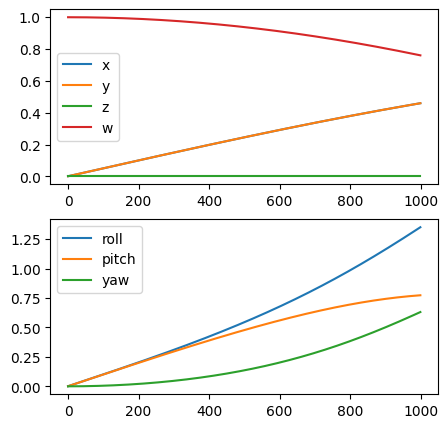

In [14]:
import torch
from adaptive_control_gym.utils import geom
import matplotlib.pyplot as plt
import numpy as np

quat_drones = torch.tensor([0.0, 0.0, 0.0, 1.0])
sim_dt = 1e-4
vrpy_drones = torch.ones(3)*10
vrpy_drones[2] = 0.0

# integrate the for 1000 steps and visualize the result
quat_list = []
rpy_list = []
for i in range(1000):
    quat_drones = geom.integrate_quat(quat_drones, vrpy_drones, sim_dt)
    quat_list.append(quat_drones.numpy())
    rpy_list.append(geom.quat2rpy(quat_drones).numpy())

# plot results in 2 subplots
quat_list = np.array(quat_list)
rpy_list = np.array(rpy_list)
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
axes[0].plot(quat_list[:, 0], label='x')
axes[0].plot(quat_list[:, 1], label='y')
axes[0].plot(quat_list[:, 2], label='z')
axes[0].plot(quat_list[:, 3], label='w')
axes[0].legend()
axes[1].plot(rpy_list[:, 0], label='roll')
axes[1].plot(rpy_list[:, 1], label='pitch')
axes[1].plot(rpy_list[:, 2], label='yaw')
axes[1].legend()


In [20]:
quat = torch.tensor([[ 0.0445,  0.7057, -0.0445,  0.7057]])
quat = torch.load('/home/pcy/rl/policy-adaptation-survey/adaptive_control_gym/envs/results/error_tensor_1683287126.5533292.pt')
geom.quat2rpy(quat), quat

np.arccos(quat[0,3].item())*2, np.pi/3

(1.5747656923676534, 1.0471975511965976)